In [1]:
from google.colab import drive
import os
import random
import shutil

drive.mount('/content/drive')
# !unzip "/content/drive/My Drive/102flowers.zip" -d "/content/drive/My Drive/"


dataset_path = "/content/drive/My Drive/jpg"
image_filenames = os.listdir(dataset_path)
image_filenames.sort()
print(len(image_filenames))

Mounted at /content/drive
8189


In [ ]:
import scipy.io
import cv2, numpy as np
mat = scipy.io.loadmat('/content/imagelabels.mat')
labels=mat["labels"][0]
# for i in labels:
#   print(i)
print(len(labels))
print(type(str(labels[0],'UTF-8')))

In [ ]:
FLOWER_CLASS_NAMES = {'21': 'fire lily', '3': 'canterbury bells', '45': 'bolero deep blue', '1': 'pink primrose',
                      '34': 'mexican aster', '27': 'prince of wales feathers', '7': 'moon orchid', '16': 'globe-flower',
                      '25': 'grape hyacinth', '26': 'corn poppy', '79': 'toad lily', '39': 'siam tulip', '24': 'red ginger',
                      '67': 'spring crocus', '35': 'alpine sea holly', '32': 'garden phlox', '10': 'globe thistle', '6': 'tiger lily',
                      '93': 'ball moss', '33': 'love in the mist', '9': 'monkshood', '102': 'blackberry lily', '14': 'spear thistle',
                      '19': 'balloon flower', '100': 'blanket flower', '13': 'king protea', '49': 'oxeye daisy', '15': 'yellow iris',
                      '61': 'cautleya spicata', '31': 'carnation', '64': 'silverbush', '68': 'bearded iris', '63': 'black-eyed susan',
                      '69': 'windflower', '62': 'japanese anemone', '20': 'giant white arum lily', '38': 'great masterwort', '4': 'sweet pea',
                      '86': 'tree mallow', '101': 'trumpet creeper', '42': 'daffodil', '22': 'pincushion flower', '2': 'hard-leaved pocket orchid',
                      '54': 'sunflower', '66': 'osteospermum', '70': 'tree poppy', '85': 'desert-rose', '99': 'bromelia', '87': 'magnolia',
                      '5': 'english marigold', '92': 'bee balm', '28': 'stemless gentian', '97': 'mallow', '57': 'gaura', '40': 'lenten rose',
                      '47': 'marigold', '59': 'orange dahlia', '48': 'buttercup', '55': 'pelargonium', '36': 'ruby-lipped cattleya',
                      '91': 'hippeastrum', '29': 'artichoke', '71': 'gazania', '90': 'canna lily', '18': 'peruvian lily', '98': 'mexican petunia',
                      '8': 'bird of paradise', '30': 'sweet william', '17': 'purple coneflower', '52': 'wild pansy', '84': 'columbine',
                      '12': "colt's foot", '11': 'snapdragon', '96': 'camellia', '23': 'fritillary', '50': 'common dandelion', '44': 'poinsettia',
                      '53': 'primula', '72': 'azalea', '65': 'californian poppy', '80': 'anthurium', '76': 'morning glory', '37': 'cape flower',
                      '56': 'bishop of llandaff', '60': 'pink-yellow dahlia', '82': 'clematis', '58': 'geranium', '75': 'thorn apple',
                      '41': 'barbeton daisy', '95': 'bougainvillea', '43': 'sword lily', '83': 'hibiscus', '78': 'lotus lotus', '88': 'cyclamen',
                      '94': 'foxglove', '81': 'frangipani', '74': 'rose', '89': 'watercress', '73': 'water lily', '46': 'wallflower',
                      '77': 'passion flower', '51': 'petunia'}

In [ ]:
dataset=[]
for i in range(8189):
  dataset.append([image_filenames[i],labels[i]])
dataset = np.asarray(dataset)

In [ ]:
from sklearn.model_selection import train_test_split
train, test_valid = train_test_split(dataset, test_size=0.50,random_state=1, stratify=dataset[:,1])

test, valid = train_test_split(test_valid, test_size=0.50,random_state=1, stratify=test_valid[:,1])
print(len(train))
print(len(test))
print(len(valid))

4094
2047
2048


In [ ]:
cur_dir_path = os.path.join("/content/train")
if not os.path.exists(cur_dir_path):
    os.mkdir(cur_dir_path)
for i in range(1,103):
    class_dir = os.path.join("/content/train", str(i))
    os.mkdir(class_dir)

for label in train:
    filename = str(label[0])
    src = os.path.join("/content/drive/My Drive/jpg",filename)
    dst = os.path.join("/content/train", label[1], src.split(os.sep)[-1])
    shutil.copyfile(src, dst)

In [ ]:
cur_dir_path = os.path.join("/content/validation")
if not os.path.exists(cur_dir_path):
    os.mkdir(cur_dir_path)
for i in range(1,103):
    class_dir = os.path.join("/content/validation", str(i))
    os.mkdir(class_dir)

for label in valid:
    filename = str(label[0])
    src = os.path.join("/content/drive/My Drive/jpg",filename)
    dst = os.path.join("/content/validation", label[1], src.split(os.sep)[-1])
    shutil.copyfile(src, dst)

In [ ]:
cur_dir_path = os.path.join("/content/test")
if not os.path.exists(cur_dir_path):
    os.mkdir(cur_dir_path)
for i in range(1,103):
    class_dir = os.path.join("/content/test", str(i))
    os.mkdir(class_dir)

for label in test:
    filename = str(label[0])
    src = os.path.join("/content/drive/My Drive/jpg",filename)
    dst = os.path.join("/content/test", label[1], src.split(os.sep)[-1])
    shutil.copyfile(src, dst)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
BATCH_SIZE = 64 # Set the paths to the training, validation, and test set folders
train_path = "/content/train"
val_path = "/content/validation"
test_path = "/content/test"

# Set the image size and batch size
image_size = (224, 224)
batch_size = 16

# Create the image data generators
train_datagen = ImageDataGenerator(rescale=1.0/255)
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    subset='training'
)

val_datagen = ImageDataGenerator(rescale=1.0/255)
val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
)

test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 4094 images belonging to 102 classes.
Found 2048 images belonging to 102 classes.
Found 2047 images belonging to 102 classes.


In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19,preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing import image

In [ ]:
model = VGG19(weights='imagenet')


In [ ]:
new_model=Model(inputs=model.input,outputs=model.layers[-2].output)
# new_model.eval()

In [ ]:
features = []

for image_name in image_filenames:
    img_path = os.path.join(dataset_path, image_name)
    img = image.load_img(img_path, target_size=(224, 224))  # Resize the image to match VGG19 input size
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    features.append(new_model.predict(x))


In [ ]:
import pandas as pd
df=pd.DataFrame()
for i in range(8189):
  lst=np.append(features[i], labels[i])
  # lst=features[i].append(labels[i])
  df[image_filenames[i]]=lst
df1=df.T
df1.to_csv("data1.csv")

In [ ]:
shutil.copyfile("/content/data1.csv", "/content/drive/My Drive/dat1.csv")

'/content/drive/My Drive/dat1.csv'

In [2]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import train_test_split, GridSearchCV
df=pd.read_csv("/content/drive/My Drive/dat1.csv")
X=df[df.columns[1:-1]]
y=df.iloc[: , -1]


In [3]:
val_acc=[]
va_loss=[]

In [ ]:

x_train, x_test_valid,y_train,y_test_valid = train_test_split(X,y, test_size=0.50,random_state=1)
x_test, x_valid,y_test,y_valid = train_test_split(x_test_valid,y_test_valid, test_size=0.50,random_state=42)
clf = MLPClassifier(random_state=1)
param_grid = {
  'hidden_layer_sizes': [(100,), (100, 100), (100, 100, 100)],
  'max_iter': [200, 300, 400],
  'alpha': [0.0001, 0.001, 0.01],
  'solver': ['sgd', 'adam']
}
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(x_valid, y_valid)
best_model = grid_search.best_estimator_
best_model.fit(x_train,y_train)
y_pred_test = best_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy with Best Hyperparameters:", test_accuracy)
val_acc.append(test_accuracy)
test_loss=log_loss(y_valid,best_model.predict_proba(x_valid))
va_loss.append(test_loss)
# clf = MLPClassifier(solver='sgd', alpha=0.0001, max_iter=300, random_state=1)
# clf.fit(x_train,y_train)
# y_pred=clf.predict(x_test)
#

In [9]:

x_train, x_test_valid,y_train,y_test_valid = train_test_split(X,y, test_size=0.50,random_state=1)
x_test, x_valid,y_test,y_valid = train_test_split(x_test_valid,y_test_valid, test_size=0.50,random_state=42)
clf = MLPClassifier(random_state=1)
param_grid = {
  'hidden_layer_sizes': [(100,), (100, 100), (100, 100, 100)],
  'max_iter': [200, 300, 400],
  'alpha': [0.0001, 0.001, 0.01],
  'solver': ['sgd', 'adam']
}
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(x_valid, y_valid)
best_model = grid_search.best_estimator_
best_model.fit(x_train,y_train)
y_pred_test = best_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy with Best Hyperparameters:", test_accuracy)
val_acc.append(test_accuracy)
test_loss=log_loss(y_valid,best_model.predict_proba(x_valid))
va_loss.append(test_loss)
# clf = MLPClassifier(solver='sgd', alpha=0.0001, max_iter=300, random_state=1)
# clf.fit(x_train,y_train)
# y_pred=clf.predict(x_test)
#

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochast

Test Accuracy with Best Hyperparameters: 0.8290180752320468


In [11]:
print(grid_search.best_params_)

{'alpha': 0.001, 'hidden_layer_sizes': (100,), 'max_iter': 200, 'solver': 'adam'}


In [12]:
print(val_acc)
print(va_loss)

[0.8290180752320468, 0.8290180752320468]
[0.8034737502458817, 0.8034737502458817]


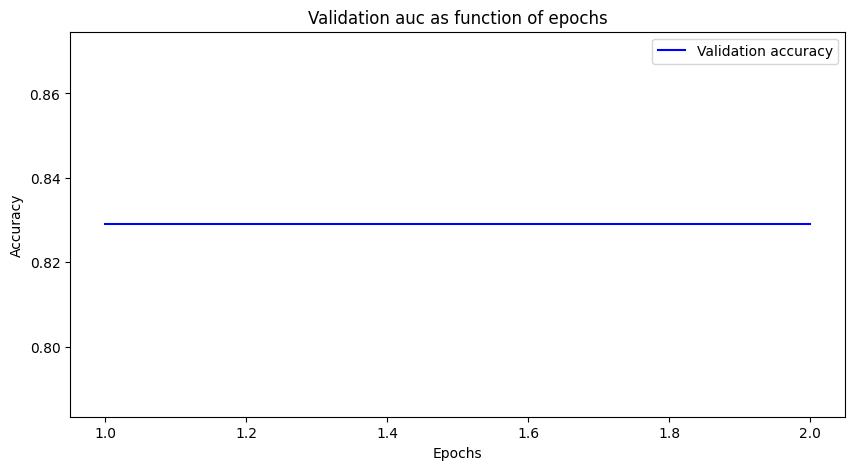

In [13]:
#accuracy graph
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
epochs=range(1,len(val_acc)+1)
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.title('Validation auc as function of epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

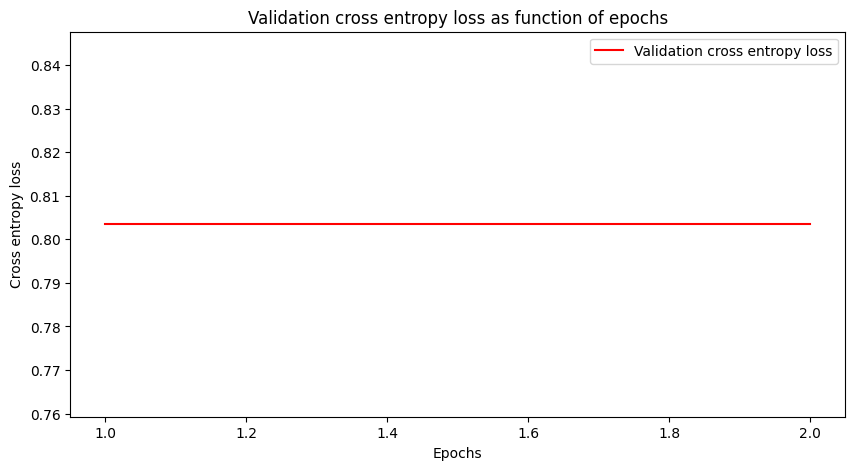

In [14]:
#entropy graph
plt.figure(figsize=(10,5))
epochs=range(1,len(val_acc)+1)
plt.plot(epochs,va_loss,'r',label='Validation cross entropy loss')
plt.title('Validation cross entropy loss as function of epochs')
plt.xlabel('Epochs')
plt.ylabel('Cross entropy loss')
plt.legend()
plt.show()